### **1.Consumo di alcol per paese** 
Esegui un’**analisi esplorativa** focalizzata sul **consumo di alcol**.  
Analizza i seguenti aspetti:
* Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto)

* Calcola la media del consumo di birra, vino, e distillati

* Crea una nuova colonna alcohol_index che sia: `(beer_servings + wine_servings + spirit_servings) / 3`

* Trova il paese con il valore massimo di alcohol_index

* Filtra solo i paesi che consumano più di 100 birre all’anno

Crea un bar chart dei 10 paesi con più consumo totale (total_litres_of_pure_alcohol)

Crea un line plot con wine_servings ordinato per paese (usa sort_values)

La media delle birre è: 106.16062176165804
La media dei vini è: 49.45077720207254
La media dei distillati è: 80.99481865284974
country                            Andorra
beer_servings                          245
spirit_servings                        138
wine_servings                          312
total_litres_of_pure_alcohol          12.4
alcohol_index                   231.666667
Name: 3, dtype: object
               country  beer_servings  spirit_servings  wine_servings  \
3              Andorra            245              138            312   
4               Angola            217               57             45   
5    Antigua & Barbuda            102              128             45   
6            Argentina            193               25            221   
8            Australia            261               72            212   
..                 ...            ...              ...            ...   
182     United Kingdom            219              126            195   
184     

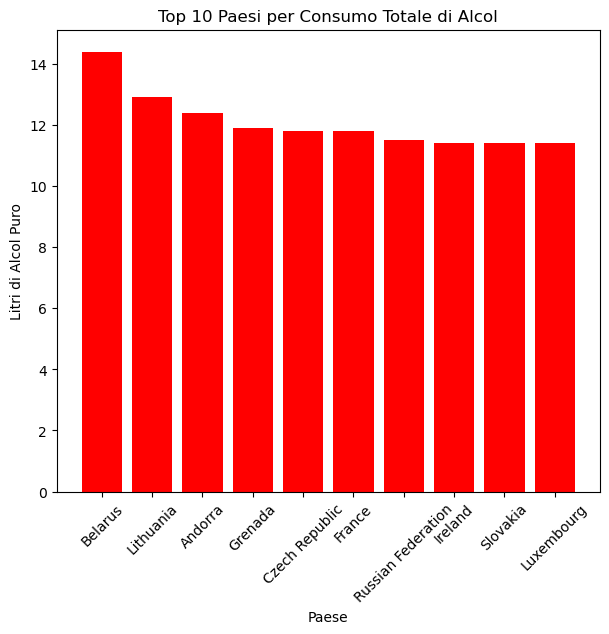

<Axes: xlabel='country'>

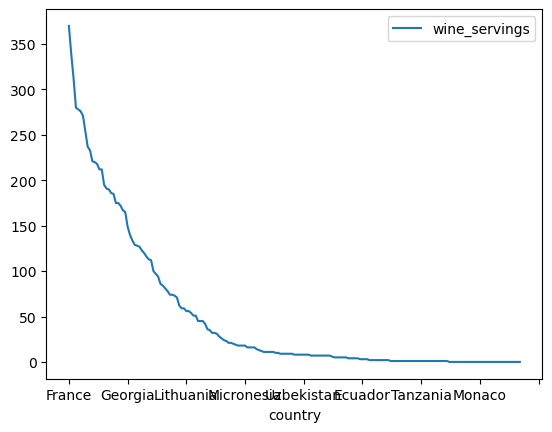

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")

ordine_birre= df.sort_values(by="beer_servings",ascending=False)


media_beer=df.beer_servings.mean()
media_wine=df.wine_servings.mean()
media_dist=df.spirit_servings.mean()

print("La media delle birre è:", media_beer)
print("La media dei vini è:", media_wine)
print("La media dei distillati è:", media_dist)

df['alcohol_index']=(df.beer_servings+df.wine_servings+df.spirit_servings)/3

maxconsum= df.alcohol_index.idxmax()
print(df.iloc[maxconsum])

magg_cento=df[df['beer_servings'] > 100]
print(magg_cento)

top10_total = df.sort_values(by="total_litres_of_pure_alcohol", ascending=False).head(10)
print(top10_total)

toppaese=top10_total['country']
toplitri=top10_total['total_litres_of_pure_alcohol']

plt.figure(figsize=(7, 6))
plt.bar(toppaese, toplitri, color='red')
plt.title('Top 10 Paesi per Consumo Totale di Alcol')
plt.xlabel('Paese')
plt.ylabel('Litri di Alcol Puro')
plt.xticks(rotation=45)
plt.show()

wine_ordinato=df.sort_values(by='wine_servings', ascending=False)
wine_ordinato.plot(x='country',y="wine_servings",kind="line")


### **2.Analisi offerte di lavoro** 

Esegui un’**analisi esplorativa** focalizzata sui **lavori nel campo dei dati in ciascun paese**.  
Analizza i seguenti aspetti per ogni paese:

* Lo **stipendio medio annuale** (`salary_year_avg`)
* Il **numero totale di offerte di lavoro** (job count)
* L’intervallo degli stipendi: **valore minimo e massimo** (`min` / `max`)

Rappresenta graficamente lo stipendio medio (`salary_year_avg`) per `job_title_short` usando un grafico a barre orizzontali. Ordina i dati dallo stipendio più alto al più basso. Includi un titolo e le etichette per gli assi x e y.

15000.0
960000.0


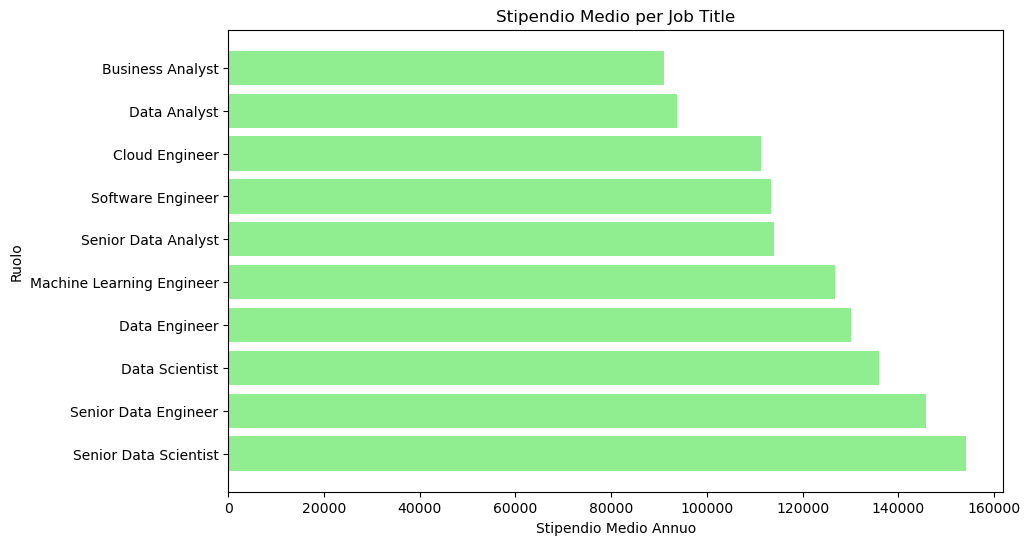

In [ ]:
import pandas as pd
from datasets import load_dataset


dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

media_stipendio=df.groupby('job_country')['salary_year_avg'].mean()
totale_paese=df.groupby('job_country')['job_title'].count()

valore_min=df['salary_year_avg'].min()
valore_max=df['salary_year_avg'].max()


print(valore_min)
print(valore_max)

stipendi = df.groupby("job_title_short")["salary_year_avg"].mean().sort_values(ascending=False).rename("stipendio_medio")

plt.figure(figsize=(10, 6))
plt.barh(stipendi.index, stipendi.values, color='red')
plt.title("Stipendio Medio per Job Title")
plt.xlabel("Stipendio Medio Annuo")
plt.ylabel("Ruolo")
plt.show()
